<a href="https://colab.research.google.com/github/Yael0706/IA-ACTIVITIES/blob/main/pia_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Artificial Intelligence Class**
---
## **Team 1**
### **Names:**
*Pedro Alberto Velez Platas  1956896*

*Gonzalo Hernandez Ponzio 2003582*

*Jared Damian Rodriguez Castañon 1997259*

*Edgar Yael Moreno García 2021283*

### **Career:** Biomedical Engineering  

---

### **Class:** Artificial Intelligence  
### **Professor:** Daniel Isaías López Páez  
### **Hour:** Tuesday N4-N6  
### **Group:** 001  

---

</center>


# **Assignment 7 / PIA.- Convolutional Neural Network.**


**Goal.-**

To train a convolutional neural network model.


**Instructions.-**

* The student will train a Convolutional Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9. The dataset is part of the Keras library. More information about this dataset: https://keras.io/api/datasets/mnist/

* During data preprocessing, the "load_data()" function from the Keras library will be used to load the dataset and generate the training (train_data, train_labels) and test (test_data, test_label) datasets. The default data split provided by this function can be used.

* A feedforward artificial neural network will be trained with the training data using the "fit" function from the scikit-learn library. The student will propose a structure for the feedforward artificial neural network. The activation function in the output layer should be softmax.

* The type of loss function and optimizer to be used will be established. The metric to evaluate the training process will be accuracy.

* Use the "evaluate" function to display the prediction accuracy of the model with the test dataset (test_data).

* Perform 5 different predictions with the test dataset (test_data). In the result, display the prediction and the actual value.

# Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
try:
    from keras.optimizer import Adam
except:
    from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load data set

In [ ]:
dataset = "navoneel/brain-mri-images-for-brain-tumor-detection"

output_dir = "datasets/brain_mri_images"

os.makedirs(output_dir, exist_ok=True)

os.system(f"kaggle datasets download -d {dataset} -p {output_dir} --unzip")

print(f"Dataset descargado en {output_dir}")


Dataset descargado en datasets/brain_mri_images


# Data preprocessing

In [ ]:
MAIN_DIR = "/content/datasets/brain_mri_images/brain_tumor_dataset/"
SEED = 82

In [ ]:
Labels = os.listdir(MAIN_DIR)
Labels

['no', 'yes']

In [ ]:
for dirpath,dirnames,filenames in os.walk(MAIN_DIR):
    print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

2 directories and 0 images in /content/datasets/brain_mri_images/brain_tumor_dataset/
0 directories and 98 images in /content/datasets/brain_mri_images/brain_tumor_dataset/no
0 directories and 155 images in /content/datasets/brain_mri_images/brain_tumor_dataset/yes


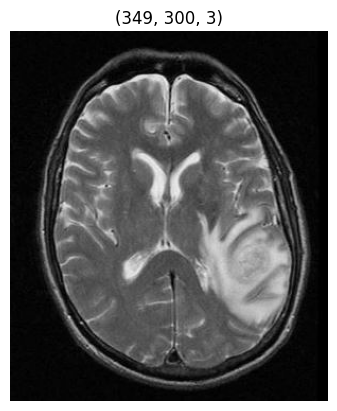

In [ ]:
# Inspect the raw data before preprocessing
def view_random_image():

    subdirs = ['yes/','no/']
    subdir = np.random.choice(subdirs)
    target_folder = MAIN_DIR + subdir

    random_image = random.sample(os.listdir(target_folder), 1)

    img = cv2.imread(target_folder+random_image[0])
    plt.imshow(img, cmap="gray")
    plt.axis(False)
    plt.title(img.shape)
    plt.show()
view_random_image()

In [ ]:
# Parámetros
IMG_SHAPE = (128, 128)
BATCH_SIZE = 32

# Crear el generador de datos
datagen = ImageDataGenerator(rescale=1/255.)

# Cargar todas las imágenes y etiquetas
data_gen = datagen.flow_from_directory(
    MAIN_DIR,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

images, labels = [], []

for i in range(len(data_gen)):
    batch_images, batch_labels = next(data_gen)
    images.extend(batch_images)
    labels.extend(batch_labels)

images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42
)

# Verificar dimensiones
print(f"Train images: {train_images.shape}, Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}, Test labels: {test_labels.shape}")


Found 253 images belonging to 2 classes.
Train images: (177, 128, 128, 3), Train labels: (177,)
Test images: (76, 128, 128, 3), Test labels: (76,)


In [ ]:
# Preprocessing: visualization of variables and image normalization.
train_images.shape

(177, 128, 128, 3)

In [ ]:
train_labels

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1.], dtype=float32)

In [ ]:
test_images.shape

(76, 128, 128, 3)

In [ ]:
len(train_labels)

177

In [ ]:
len(test_labels)

76

# Train

In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, padding='same'))

In [ ]:
# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Model Compliation: Features
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# CNN training
history = model.fit(train_data,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

In [ ]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5436 - loss: 0.6636 - val_accuracy: 0.5921 - val_loss: 0.6762
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7155 - loss: 0.5303 - val_accuracy: 0.7237 - val_loss: 0.6121
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7886 - loss: 0.4768 - val_accuracy: 0.7368 - val_loss: 0.6627
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7427 - loss: 0.5124 - val_accuracy: 0.7237 - val_loss: 0.5584
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8392 - loss: 0.4311 - val_accuracy: 0.7500 - val_loss: 0.6170
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8459 - loss: 0.3889 - val_accuracy: 0.7500 - val_loss: 0.6104
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8228 - loss: 0.4399 - val_accuracy: 0.7368 - val_loss: 0.5359
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8725 - loss: 0.3973 - val_accuracy: 0.7763 - val_loss: 0.5694
Epoch 9/

# Model testing

In [ ]:
# Function to plot loss curves
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """
    import matplotlib.pyplot as plt

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

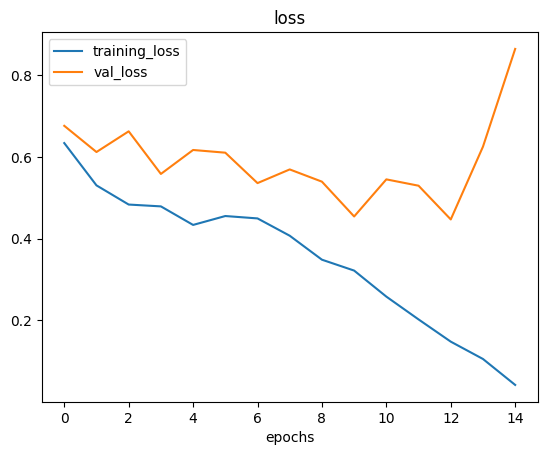

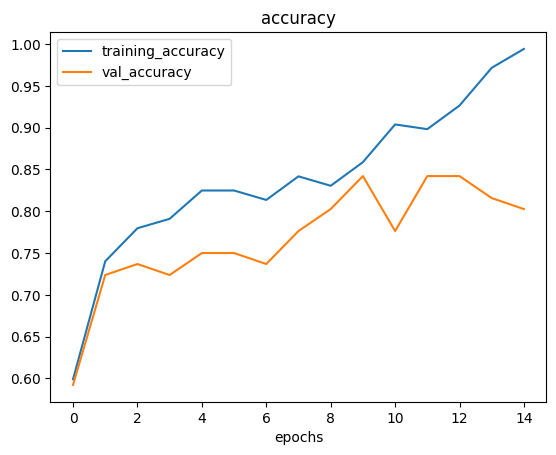

In [ ]:
plot_curves(history)

# Predictions with the trained CNN.
 At least 5 predictions.

In [ ]:
predictions = model.predict(test_images)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 751ms/step


In [ ]:
x = predictions[1]
y = test_labels[1]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.7297851] y la clase verdadera es: 1.0


In [ ]:
x = predictions[50]
y = test_labels[50]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.04674464] y la clase verdadera es: 0.0


In [ ]:
x = predictions[40]
y = test_labels[40]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.9975709] y la clase verdadera es: 1.0


In [ ]:
x = predictions[68]
y = test_labels[68]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.11656132] y la clase verdadera es: 1.0


In [ ]:
x = predictions[21]
y = test_labels[21]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.999242] y la clase verdadera es: 1.0


# References

1. https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection?select=no